In [4]:
%load_ext autoreload
%autoreload 2
from src.deep.data.data_analyzer import DataAnalyzer
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


the folder ../../data/datasets/iq/qam1024_15x3/15_samples_mu=0.001 contains 15 samples


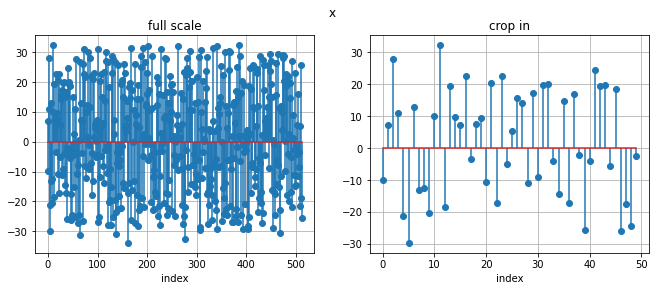

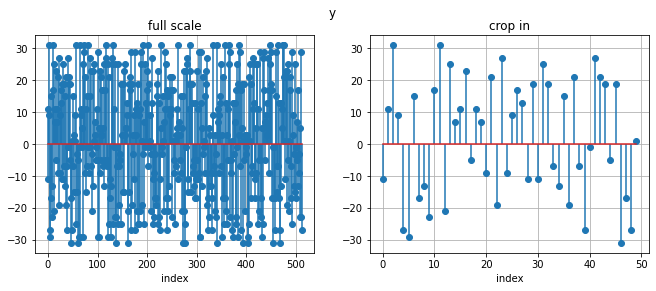

x_power=622.1361571250438
images saved to ../../data/datasets/iq/qam1024_15x3/_analyzation/15_samples_mu=0.001


In [5]:
root_dir = f'../../data/datasets/iq/qam1024_15x3'
data_analyzer = DataAnalyzer(root_dir,_tqdm=tqdm)
data_analyzer.plot_single_sample(is_save=False)

In [6]:
data_analyzer.calc_ber_for_subfolder(mu=0.001, n=10)

  0%|          | 0/10 [00:00<?, ?it/s]

the avg ber of mu=0.001 (with 10 permutations) is 0.4331250000000001


  0%|          | 0/4 [00:00<?, ?it/s]

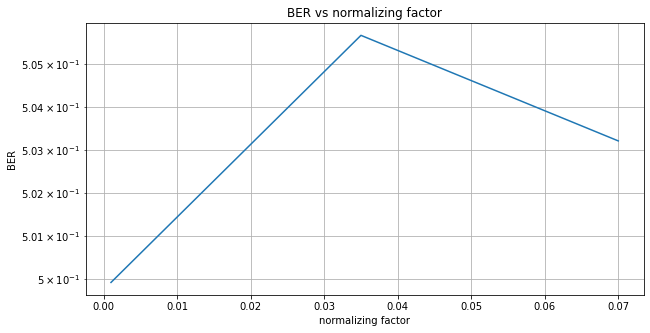

ber vs mu saved to ../../data/datasets/iq/qam1024_15x3/_analyzation/ber_vs_mu.png


In [7]:
data_analyzer.plot_full_ber_graph(n=5,is_save=False)